In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeRegressor

In [2]:
pg = sns.load_dataset("penguins")
pg = pg.dropna()

In [3]:
pg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [4]:
pg_train, pg_test = train_test_split(pg, test_size=0.3, random_state=42, stratify=pg['species'])
print(pg_train.shape, pg_test.shape)

(233, 7) (100, 7)


In [5]:
features= ['flipper_length_mm'] # add 'petal_width' ('species' does not work; categorical is not implemented in DT of sciki learn)
dt_regression = DecisionTreeRegressor(max_depth = 3) # Increase max_depth to see effect in the plot
dt_regression.fit(pg_train[features], pg_train['bill_depth_mm'])

DecisionTreeRegressor(max_depth=3)

In [6]:
def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

In [7]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [8]:
predictionsOnTrainset = dt_regression.predict(pg_train[features])
predictionsOnTestset = dt_regression.predict(pg_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, pg_train.bill_depth_mm)
rmseTest = calculate_rmse(predictionsOnTestset, pg_test.bill_depth_mm)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 1.196246269714804
RMSE on test set 1.2352158198953647


## Is the RMSE different? Did you expect this difference?
Yes, it slightly differs per set. I expected this because the test set uses a smaller set than the training set, so there are fewer values that can impact the calculation.

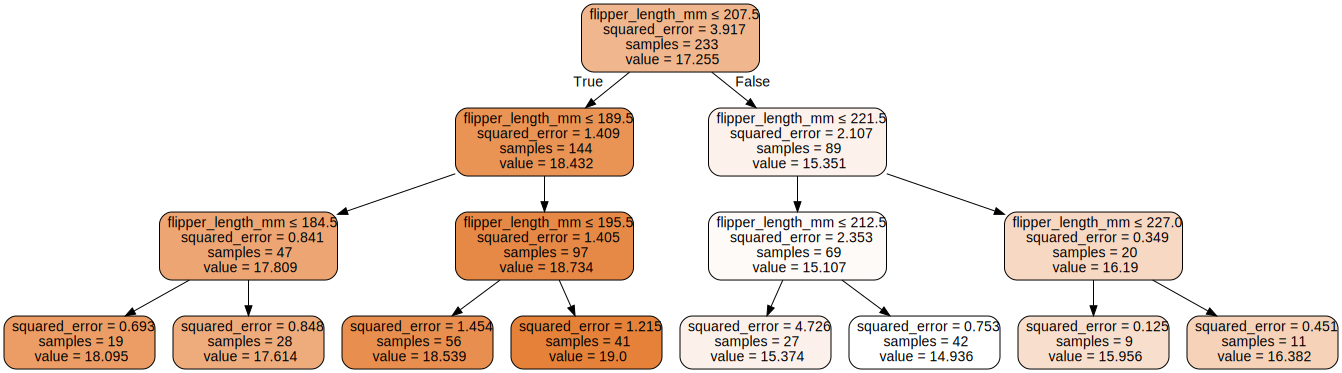

In [9]:
plot_tree_regression(dt_regression, features)